## 📊 Telco Customer Churn Prediction Using ANN (TensorFlow/Keras)

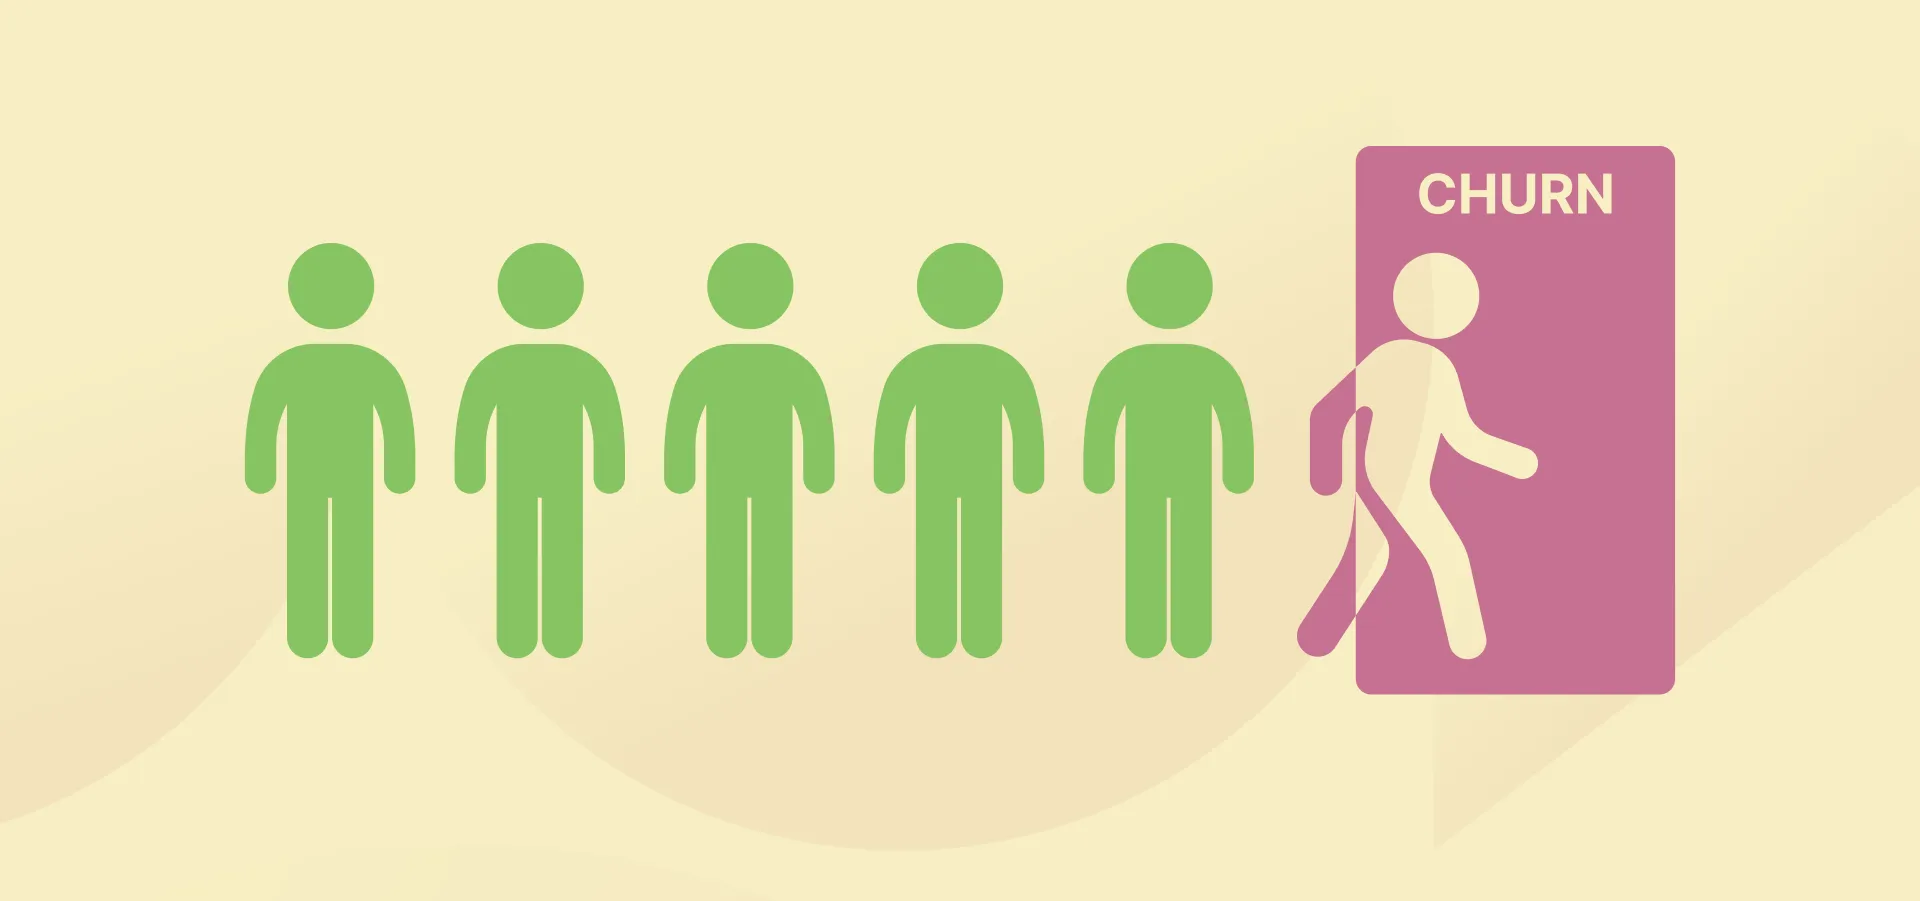

## 📁  <span style="color: #0000FF"> **Table of Contents**

* [Objectives](#obj)

* [Dataset Overview](#data)

* [Load and Prepare Data ](#prep)
  * [Loading Libraries](#sub_3_1)
  * [Read-in Data](#sub_3_2)

* [Exploratory Data Analysis](#eda)
  * [Churn-Rate Analysis](#sub_4_1)
      * [Tenure vs Churn:](#sub_4_1_1)
      * [Monthly Charges vs Churn:](#sub_4_1_2)
      * [Total Charges vs Churn:](#sub_4_1_3)
  * [Key Churn Indicators ](#sub_4_2)

* [ANN Model Training](#ann)
  * [Data Preprocessing](#data-prep)
  * [Building the Preprocessing Pipeline](#pipeline)
  * [Training and Testing Model](#sub_5_2)
  * [Classification Report](#sub_5_3)
  * [Confusion Matrix](#sub_5_4)
  * [Model Performance Summary ](#sub_5_5)
  
* [Use-Case: Predict Churn for New Random Sample](#predict)
* [Conclusion](#conclusion)


### 🎯  <span style="color: #0000FF">**Objectives** <a id="obj"> </a>

The goal of this project is to predict customer churn using machine learning, specifically a deep learning model (ANN) built with TensorFlow and Keras. By understanding churn behavior, Telco companies can take preventive measures and improve customer retention.

**Keywords**: Python, TensorFlow, Keras, Neural Networks, Customer Churn, Classification, EDA, Machine Learning

### <span style="color: #0000FF"> **📥 Dataset Overview**<a id="data"> </a>
**Source**: Telco Customer Churn Dataset -[Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) 

- Records: 7043 customer entries
- Features: Demographics, services used, billing, and contract information
- Target Variable: Churn (Yes/No)

### <span style="color: #0000FF"> **⚙️ Load and Prepare Data** <a id="prep"> </a>

**Key Steps:**
- Handle missing values in TotalCharges column using type conversion and imputation.
- Convert categorical variables using label encoding (e.g., gender, contract type).
- Scale numeric features (tenure, MonthlyCharges, TotalCharges) using MinMaxScaler for optimal ANN performance.

### 🔧 Loading Libraries <a id ="sub_3_1"> </a>

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

### 📦 Read-in Data <a id =sub_3_2> </a>

In [171]:
df = pd.read_csv('./Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [172]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [173]:
df.drop(['customerID'], axis=1, inplace=True)
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [174]:
df['MonthlyCharges'].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [175]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # error='coerce' will replace non-numeric values with NaN

In [176]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [177]:
df[df['TotalCharges'].isna()] # rows with NaN in TotalCharges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [178]:
df.iloc[753] # iloc to access the row

gender                             Male
SeniorCitizen                         0
Partner                              No
Dependents                          Yes
tenure                                0
PhoneService                        Yes
MultipleLines                        No
InternetService                      No
OnlineSecurity      No internet service
OnlineBackup        No internet service
DeviceProtection    No internet service
TechSupport         No internet service
StreamingTV         No internet service
StreamingMovies     No internet service
Contract                       Two year
PaperlessBilling                     No
PaymentMethod              Mailed check
MonthlyCharges                    20.25
TotalCharges                        NaN
Churn                                No
Name: 753, dtype: object

In [179]:
df.shape

(7043, 20)

In [180]:
df.dropna(inplace=True) # drop rows with NaN values
df.shape

(7032, 20)

In [181]:
df.TotalCharges.dtypes

dtype('float64')

### <span style="color: #0000FF">🔍 **Exploratory Data Analysis** <a id="eda"> </a>

In [182]:
df[df['Churn'] == 'No'].shape[0] # count of customers who did not churn

5163

In [183]:
df[df['Churn'] == 'Yes'].shape[0] # count of customers who churned


1869

In [184]:
df[df['Churn'] == 'No'].tenure # average (monthly) tenure of customers who did not churn

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

#### ✨ **Churn-Rate Analysis**  <a id =sub_4_1> </a>

### Tenure vs Churn: <a id =sub_4_1_1> </a>

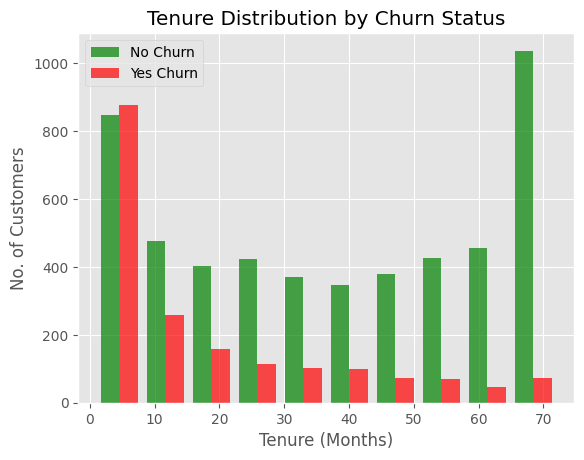

In [185]:
# Tenure distribution by Churn Status
tenure_no_churn = df[df['Churn'] == 'No'].tenure 
tenure_yes_churn = df[df['Churn'] == 'Yes'].tenure
plt.hist([tenure_no_churn, tenure_yes_churn], label=['No Churn', 'Yes Churn'], color=['green', 'red'], alpha=0.7) 
# sns.histplot(tenure_no_churn, label='Churn=No', color='blue')
# sns.histplot(tenure_yes_churn, label='Churn =Yes', color='red', alpha=0.7)
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('No. of Customers')
plt.legend()
plt.show()

* Customers with shorter tenure were significantly more likely to churn. Most long-tenure customers stayed loyal.

### Monthly Charges vs Churn: <a id =sub_4_1_2> </a>

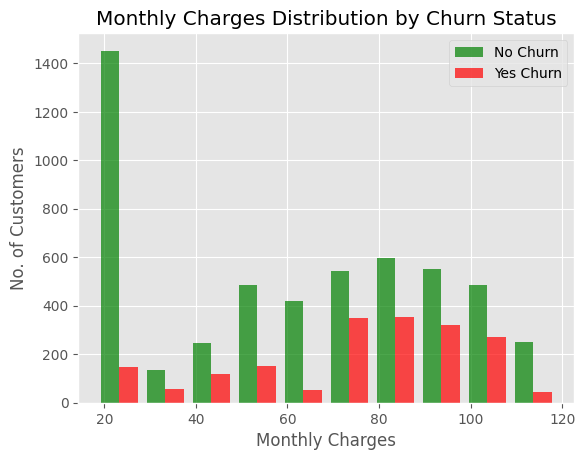

In [186]:
# Monthly Charges Distribution by Churn Status
monthly_charges_no_churn = df[df['Churn'] == 'No'].MonthlyCharges
monthly_charges_yes_churn = df[df['Churn'] == 'Yes'].MonthlyCharges
plt.hist([monthly_charges_no_churn, monthly_charges_yes_churn], label=['No Churn', 'Yes Churn'], color=['green', 'red'], alpha=0.7)
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('No. of Customers')
plt.legend()
plt.show()

* Higher monthly charges correlated with churn. Customers paying more monthly were more likely to leave.

### Total Charges vs Churn: <a id =sub_4_1_3> </a>

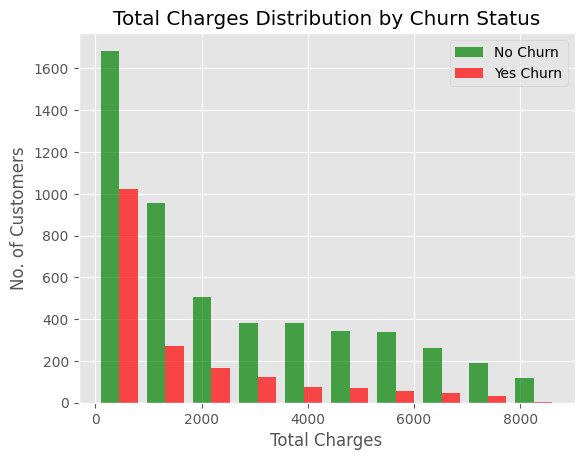

In [187]:
# Total Charges Distribution by Churn Status
total_charges_no_churn = df[df['Churn'] == 'No'].TotalCharges
total_charges_yes_churn = df[df['Churn'] == 'Yes'].TotalCharges 
plt.hist([total_charges_no_churn, total_charges_yes_churn], label=['No Churn', 'Yes Churn'], color=['green', 'red'], alpha=0.7)
plt.title('Total Charges Distribution by Churn Status')
plt.xlabel('Total Charges')
plt.ylabel('No. of Customers')
plt.legend()
plt.show()

* Customers with lower total charges (indicating short customer lifespans) showed higher churn tendencies.

### 🧩 Key Churn Indicators <a id =sub_4_2> </a>
- Short Tenure: New users tend to churn more.
- Contract Type: Month-to-month contracts are riskier for churn than long-term contracts.
- Internet Service: Fiber optic users showed higher churn rates.
- Additional Services: Customers without add-ons (online security, tech support) churned more.
- Payment Method: Electronic check users had a higher churn rate compared to those using bank transfers or credit cards.

### <span style="color: #0000FF"> 🧠 **ANN Model Training**<a id="ann"> </a>

**Model Architecture:**
* Input Layer: Normalize numerical and encode categorical features

* Hidden Layers: Multiple Dense layers with ReLU activation and Dropout for regularization

* Output Layer: Sigmoid for binary classification

### ⚙️  Data Preprocessing <a id="data-prep"> </a>

In [188]:
def unique_column_values(dataframe):
    """Print unique values for each categorical column in the DataFrame."""
    for column in df:
      if df[column].dtype == 'object':
        print(f"{column}: {df[column].unique()}")
 

In [189]:
print(unique_column_values(df))

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']
None


In [190]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [191]:
# Let's replace 'Yes' and 'No' with 1 and 0 for easier analysis
# Binary encoding
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling','Churn']
for column in yes_no_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

# Let's map gender column to binary (Female:1, Male:0)   
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

In [192]:
for column in df: 
  print(f"{column}: {df[column].unique()}") # Print unique values after mapping Yes/No to 1/0

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


### 🚂 Building the Preprocessing Pipeline <a id="pipeline"> </a>

In [193]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import joblib

In [194]:
# Let's do one hot encoding for categorical variables
# One hot encoding for categorical variables means converting categorical variables into a format that can be provided to ML algorithms to do a better job in prediction.
# This is done by creating binary columns for each category in the categorical variable.  

# Identify numeric & categorical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = ['InternetService', 'Contract', 'PaymentMethod']  # Only multi-class categoricals

# Build preprocessor pipeline using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
], remainder='passthrough')  # Keep other binary columns (already 0/1)
# remainder='passthrough' tells the transformer to keep the already-processed binary columns (like Partner, OnlineSecurity, etc.).

In [195]:
# Applying the Transformation
# Split the dataset into features (X) and target variable (y)
# We will use 'Churn' as the target variable and all other columns as features.
X= df.drop('Churn', axis=1)  # Features 
y = df['Churn']  # Target variable

# Fit and transform
X_processed = preprocessor.fit_transform(X)

In [196]:
# Save the transformation logic (preprocessor)
joblib.dump(preprocessor, 'preprocessor.pkl') 

['preprocessor.pkl']

### ✂️ Training and Testing Model <a id =sub_5_2> </a>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed,y, test_size=0.2, random_state=5, stratify=y) 
# test_size=0.2 means 20% of the data will be used for testing
# random_state=5 ensures reproducibility of the split
# stratify=y ensures that the proportion of classes is maintained in both training and testing sets
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")  # Display the shapes of the training and testing sets

Training set shape: (5625, 26), Testing set shape: (1407, 26)


In [ ]:
# TensorFlow doesn't support Python 3.12 yet, so we need to use Python 3.11 (downgrade Python version if necessary).
# If you have Python 3.11 installed, you can create a virtual environment specifically for this project.

# Create a virtual environment using Python 3.11
# py -3.11 -m venv tf_env
# py -3.11 ensures you're using the 3.11 interpreter.
# Then activate the environment: tf_env\Scripts\activate
#  python.exe -m pip install --upgrade pip # Upgrade pip to the latest version
# Install the required packages for python_v3.11 virtual environment
# pip install ipykernel # Install ipykernel to use this environment in Jupyter
# For TensorFlow, install the latest version compatible with Python 3.11 (pip install tensorflow)

from tensorflow.keras import Sequential, layers
import tensorflow as tf

In [ ]:
#  Build the Neural Network Model
model = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),  # Input layer matching your features
    layers.Dense(64, activation='relu'), # First hidden layer
    layers.Dropout(0.3),  # Dropout to reduce overfitting
    layers.Dense(32, activation='relu'),   # Second hidden layer
    layers.Dropout(0.3),    # Another dropout layer
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [ ]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

* Used ReLU activation in hidden layers and Sigmoid for binary classification.
* Optimized with Adam optimizer and binary cross-entropy loss for binary churn prediction.

In [ ]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)  # Train the model with 50 epochs and a batch size of 32
# Note: epochs = how many times the model sees the full dataset
# batch_size = how many samples it processes at once

In [ ]:
# Save the trained ANN model
model.save('customer_churn_model.keras')


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7799 - loss: 0.4250
Test Accuracy: 0.79


In [ ]:
# Make predictions on the test set
yp = model.predict(X_test)  
y_pred = (yp > 0.5).astype(int)  # Convert probabilities to binary predictions

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


### 📈 Classification Report <a id =sub_5_3> </a>

In [206]:
# Generate a classification report to evaluate the model's performance
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, y_pred))  # Print the classification report


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



### 🚨 Confusion Matrix <a id =sub_5_4> </a>

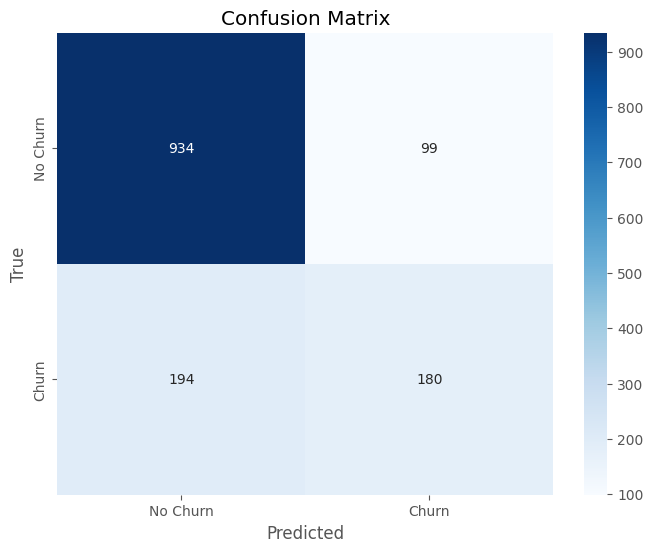

In [207]:
# Generate a confusion matrix to evaluate the model's performance
cm = confusion_matrix(y_test, y_pred)  # Compute the confusion matrix  
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])  # Create a heatmap of the confusion matrix    
plt.title('Confusion Matrix')  # Set the title of the plot
plt.xlabel('Predicted')  # Set the x-axis label
plt.ylabel('True')  # Set the y-axis label
plt.show()  # Display the plot


### 📌 Model Performance Summary <a id =sub_5_5> </a>

In [208]:
# Get classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display
report_df.round(2)

,precision,recall,f1-score,support
0,0.83,0.90,0.86,1033.00
1,0.65,0.48,0.55,374.00
accuracy,0.79,0.79,0.79,0.79
macro avg,0.74,0.69,0.71,1407.00
weighted avg,0.78,0.79,0.78,1407.00


#### 💼 Key Insights:
- High Overall Accuracy (~80%)
  * The model performs very well on the overall dataset — good generalization, especially for ANN-based churn models.

- Excellent at Predicting Non-Churners (Class 0)
  * Recall = 0.90 → Catches 90% of all retained customers.
  * Precision = 0.83 → When the model predicts "stay", it's correct 83% of the time.

- Moderate Performance for Predicting Churners (Class 1)
  * Recall = 0.48 → Detects 48% of true churners. ⚠️ Misses over half.
  * Precision = 0.65 → When it does predict churn, it's right ~65% of the time.
  * Improvement would be possible with:
    - SMOTE/resampling
    - Model ensembles
    - Cost-sensitive learning

- Balanced F1-score
  * F1 (Class 1) = 0.55 → Acceptable for imbalanced datasets
  * Macro Avg F1 = 0.71 → Balanced treatment of both classes
  * Weighted Avg F1 = 0.78 → Weighted toward class with more support (retained)


### 🤖 <span style="color: #0000FF">**Use-Case: Predict Churn for New Random Sample** <a id="predict"> </a>

In [ ]:
# Load model and preprocessor
model = tf.keras.models.load_model('customer_churn_model.keras')
preprocessor = joblib.load('preprocessor.pkl')

# New customer data (sample)
jennifer = pd.DataFrame([{
    'gender': 1,
    'SeniorCitizen': 0,
    'Partner': 1,
    'Dependents': 0,
    'tenure': 2,
    'PhoneService': 1,
    'MultipleLines': 0,
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 0,
    'OnlineBackup': 1,
    'DeviceProtection': 0,
    'TechSupport': 0,
    'StreamingTV': 1,
    'StreamingMovies': 1,
    'Contract': 'Month-to-month',
    'PaperlessBilling': 1,
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 80.85,
    'TotalCharges': 151.65
}])

# Process and predict
X_jennifer = preprocessor.transform(jennifer)
churn_prob = model.predict(X_jennifer)[0][0]

print(f"Churn probability for Jennifer Anston: {churn_prob:.2f}")
if churn_prob > 0.5:
    print("⚠️ Likely to churn. Recommend retention action.")
else:
    print("✅ Likely to stay.")


### <span style="color: #0000FF"> **🏁  Conclusion** <a id="conclusion"></a>

This project successfully demonstrates the end-to-end development of a customer churn prediction system using an Artificial Neural Network (ANN). Beginning with comprehensive data preprocessing leveraging techniques like binary encoding, MinMax scaling, and OneHotEncoding through a ColumnTransformer, the dataset was transformed into a clean, numerical format suitable for model training.

An ANN model was carefully designed using TensorFlow/Keras, incorporating hidden layers and dropout regularization to reduce overfitting. The model was trained on an 80/20 train-test split and evaluated using accuracy, precision, recall, and F1-score.

The final model achieved an **accuracy of 80%**, with strong performance in correctly identifying non-churners and acceptable performance in detecting churners. This result reflects a solid predictive ability and highlights the model's practical value in helping telecom businesses proactively identify customers at risk of leaving.

This end-to-end solution can be directly embedded into CRM platforms, enabling businesses to take timely retention actions and reduce customer attrition.